In [1]:
#read data from csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
df_train=pd.read_csv('df1_train.csv')
df_test_x=pd.read_csv('df1_test1.csv')
df_test_y=pd.read_csv('df1_test1y.csv')
def rmse(ypred, y):
    return np.sqrt(np.mean((ypred-y)**2))

In [2]:
#turn dataframe into numpy
attributes=df_train.columns.values
x_train=np.array(df_train[attributes[1:]])
y_train=np.array(df_train['life_post_consumer'])
x_test=np.array(df_test_x)
y_test=np.array(df_test_y['life_post_consumer'])

xmean=np.mean(x_train, axis=0)
xstd=np.std(x_train, axis=0)
x_train_std_all=(x_train-xmean)/xstd
x_test_std_all=(x_test-xmean)/xstd

xmean[1]=0
xmean[8:]=0
xstd[1]=1
xstd[8:]=1
x_train_std=(x_train-xmean)/xstd
x_test_std=(x_test-xmean)/xstd

ymean=np.mean(y_train, axis=0)
y_train_de=y_train-ymean

count      400.000000
mean       810.340000
std        899.037251
min         17.000000
25%        335.000000
50%        554.500000
75%        955.500000
max      11328.000000
Name: life_post_consumer, dtype: float64


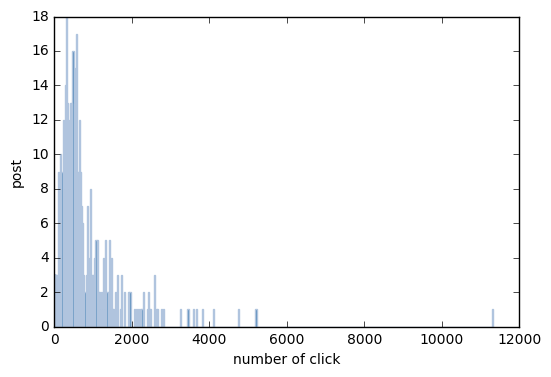

In [3]:
# Q1
plt.hist(df_train['life_post_consumer'], bins=400, color='SteelBlue', edgecolor="LightSteelBlue")
print(df_train['life_post_consumer'].describe())
plt.xlabel('number of click')
plt.ylabel('post')
plt.show()

In [4]:
import statsmodels.api as sm
model = sm.OLS(df_train['life_post_consumer'], sm.tools.add_constant(df_train[attributes[1:]])).fit() 
# ypred=model.predict(sm.add_constant(x_test))
# print(rmse(ypred,y_test))
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     life_post_consumer   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     9.584
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           4.58e-38
Time:                        13:14:38   Log-Likelihood:                -3133.8
No. Observations:                 400   AIC:                             6356.
Df Residuals:                     356   BIC:                             6531.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       9664.9713   3376.237      2.863      0.004    3025.096    1.63e+04
comp_page_like                -0.0684      0.024     -2.841      0.005      -0.116      -0.021
Paid                         147.0597     77.810      1.890      0.060      -5.964     300.084
life_post_reach                0.0179      0.003      6.568      0.000       0.013       0.023
life_post_impression_liked    -0.0002      0.001     -0.298      0.766      -0.002       0.001
life_post_reach_liked          0.0048      0.010      0.466      0.642      -0.016       0.025
comment                        6.8214      3.351      2.035      0.043       0.230      13.413
like                          -0.6168      0.318     -1.940      0.053      -1.242       0.008
share                          7.5428      2.607      2.894      0.004       2.416      12.669
type_link                   -621.0500    184.192     -3.372      0.001    -983.290    -258.810
type_status                 1368.4888    146.323      9.353      0.000    1080.723    1656.255
type_video                    49.7452    280.314      0.177      0.859    -501.533     601.024
cat2                        -138.2624    105.575     -1.310      0.191    -345.891      69.366
cat3                        -126.6455     98.183     -1.290      0.198    -319.736      66.445
month1                     -3291.4947   1298.802     -2.534      0.012   -5845.784    -737.205
month2                     -2511.9752   1144.473     -2.195      0.029   -4762.754    -261.197
month3                     -2255.6194    957.911     -2.355      0.019   -4139.496    -371.743
month4                     -2018.9619    710.473     -2.842      0.005   -3416.213    -621.711
month5                     -1462.6993    538.144     -2.718      0.007   -2521.041    -404.357
month6                      -819.8254    367.689     -2.230      0.026   -1542.941     -96.710
month7                      -627.3824    277.139     -2.264      0.024   -1172.418     -82.347
month8                      -492.6017    233.868     -2.106      0.036    -952.539     -32.665
month9                      -248.6596    202.314     -1.229      0.220    -646.540     149.221
month10                     -236.7942    162.424     -1.458      0.146    -556.225      82.636
month11                     -482.0112    161.102     -2.992      0.003    -798.843    -165.179
dow1                         152.3039    120.916      1.260      0.209     -85.495     390.103
dow2                        -173.7843    124.383     -1.397      0.163    -418.402      70.833
dow3                          30.7369    126.538      0.243      0.808    -218.118     279.592
dow4                        -195.5752    131.129     -1.491      0.137    -453.460      62.309
dow5                         -70.6704    12

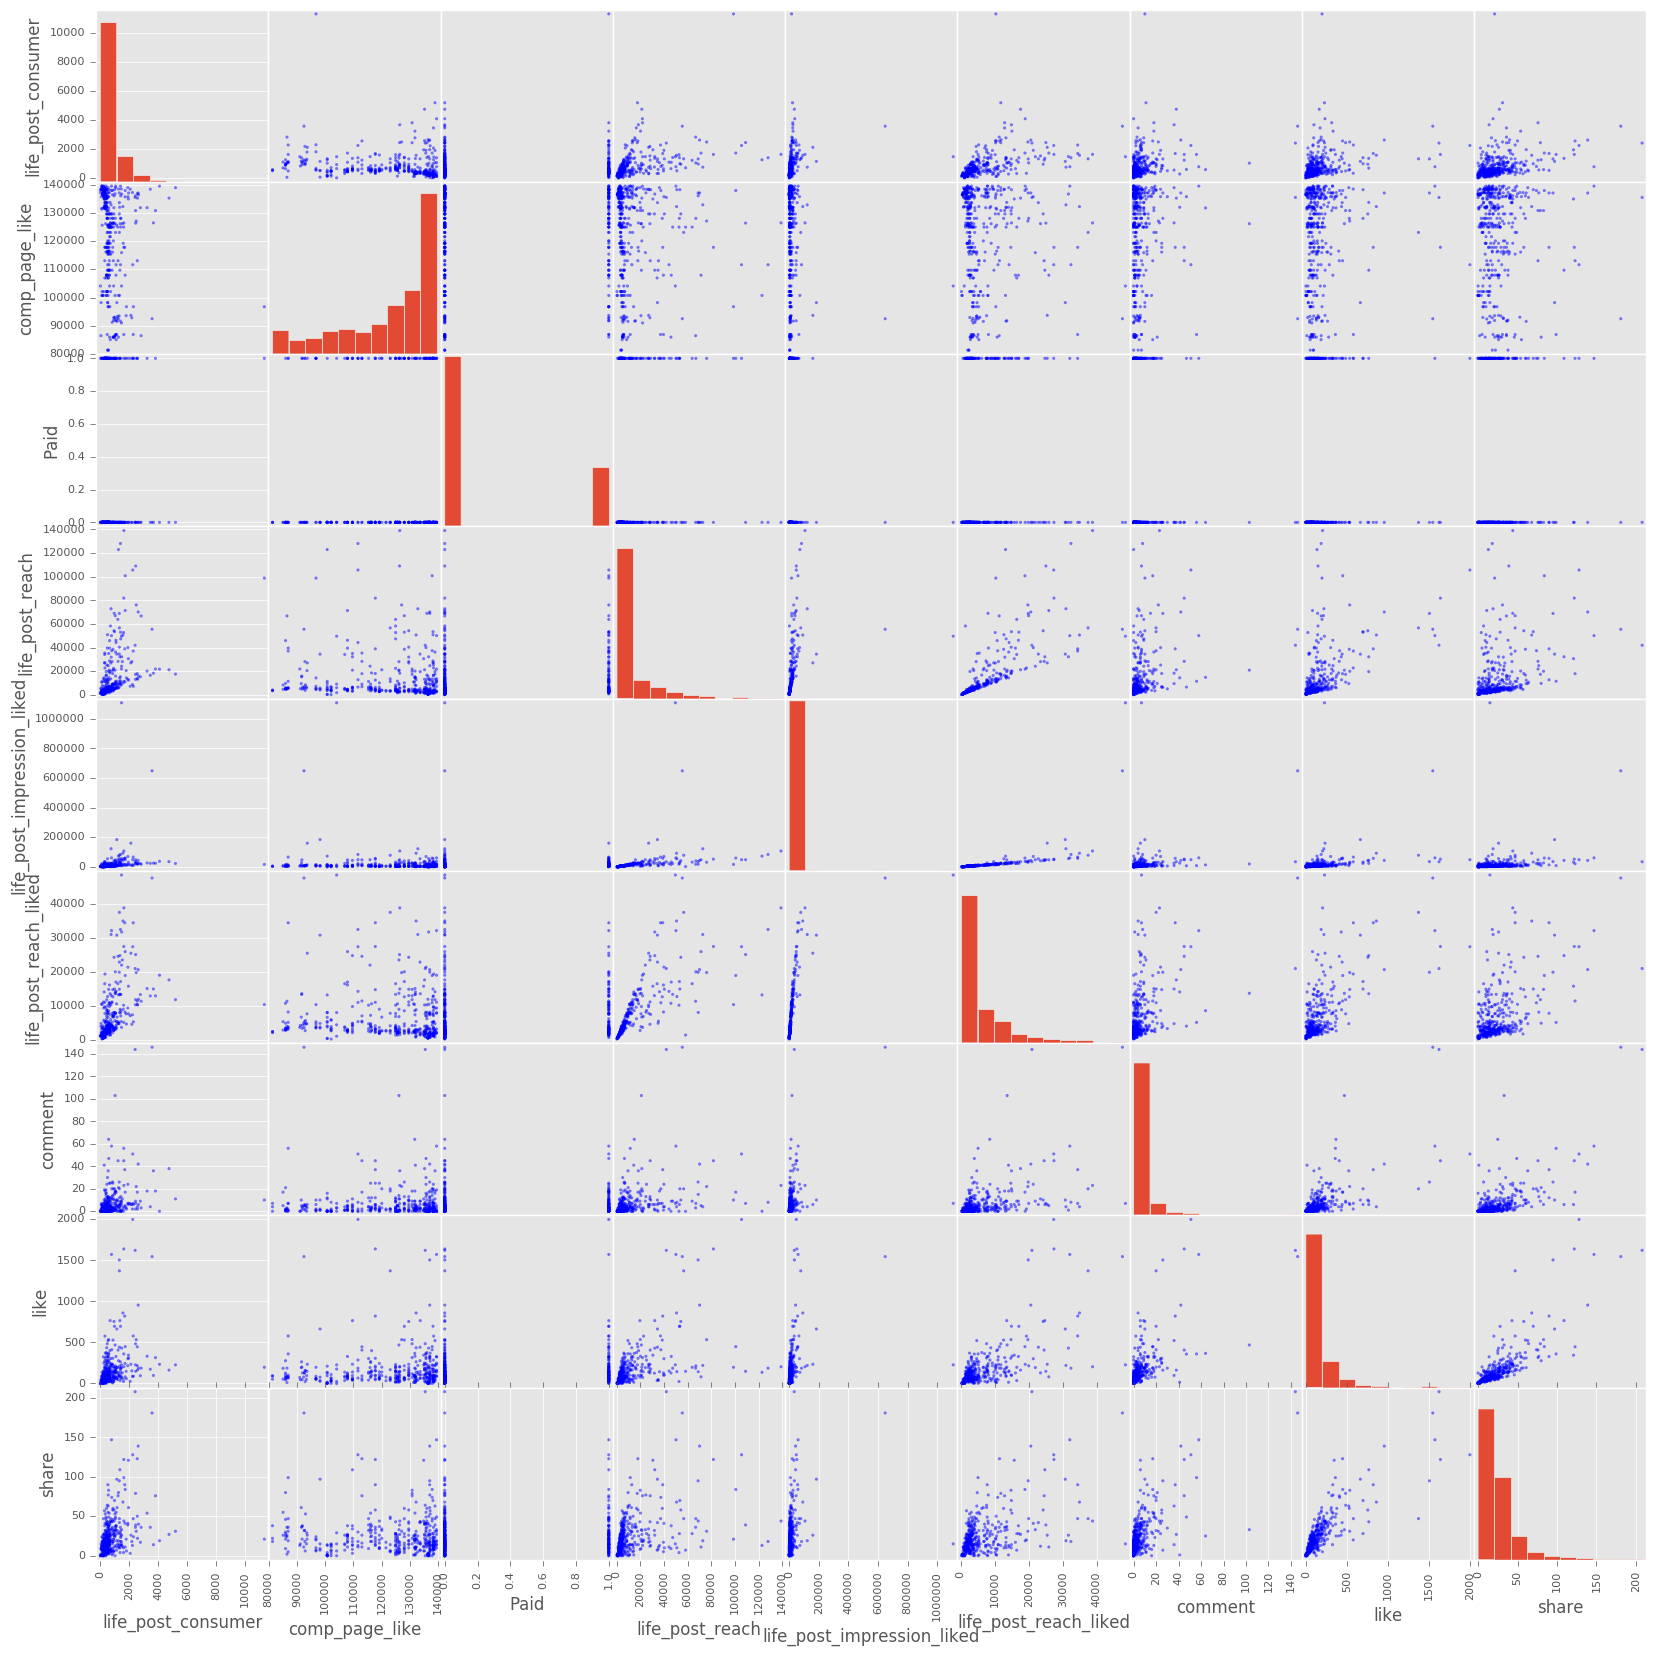

In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
attributes=df_train.columns.values
scatter_matrix(df_train[attributes[:9]], figsize = (20, 20))
plt.show()

In [ ]:
"""
資料概述:

training data總共400筆，44維，第一維是預測值，其他是feature。
test data總共50筆，兩個檔案，一個存預測值，一個存feature。
feature裡只有7個是數值資料，其他是0/1的dummy variable，
從圖和回歸結果可以看出很多feature之間其實有相關性，不是獨立的，所以會造成某些feature的t-value檢測出來變得不顯著。
"""

In [8]:
# case1
c1=rmse(ymean, y_test)
print("rmse:",c1)
print("prediction:\n",np.ones(20)*ymean)
print("true value:\n",y_test[:20])

rmse: 928.8095109332162
prediction:
 [810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34
 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34]
true value:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [9]:
# case2A
import time
start=time.time()
lin=LinearRegression().fit(x_train, y_train)
end=time.time()
ypred=lin.predict(x_test)
c2a=rmse(ypred,y_test)
print("rmse:",c2a)
print("prediction:\n",ypred[:20])
print("true value:\n",y_test[:20])
print(end-start)

rmse: 692.2891271365901
prediction:
 [ 781.57991506  315.92043113 2279.0848524  -136.34286372  302.35624063
  462.42402368  321.67770825  504.52244768  505.89547105  488.36700579
  392.6142352   388.91846711  804.8752751   634.32364432  176.31765619
  645.7291381  1983.53858872 3144.39710045 4060.61071214 4288.22308101]
true value:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
0.12086105346679688


In [10]:
# case2B
start=time.time()
lin=LinearRegression().fit(x_train, y_train_de)
end=time.time()
ypred=lin.predict(x_test)
ypred+=ymean
c2b=rmse(ypred, y_test)
print("rmse:",c2b)
print("prediction:\n",ypred[:20])
print("true value:\n",y_test[:20])
print(end-start)

rmse: 692.2891271355059
prediction:
 [ 781.57991506  315.92043113 2279.0848524  -136.34286372  302.35624063
  462.42402368  321.67770825  504.52244768  505.89547105  488.36700579
  392.6142352   388.91846711  804.8752751   634.32364432  176.31765619
  645.7291381  1983.53858872 3144.39710044 4060.61071214 4288.223081  ]
true value:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
0.0030851364135742188


In [11]:
# case2C
start=time.time()
lin=LinearRegression().fit(x_train_std_all, y_train_de)
end=time.time()
ypred=lin.predict(x_test_std_all)
ypred+=ymean
c2c=rmse(ypred, y_test)
print("rmse:",c2c)
print("prediction:\n",ypred[:20])
print("true value:\n",y_test[:20])
print(end-start)

rmse: 692.2891271372
prediction:
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244767  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.72913809 1983.53858871 3144.39710045 4060.61071219 4288.223081  ]
true value:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
0.002554178237915039


In [12]:
#先定義好ridge及lasso函數
def ridge(x_train, y_train, x_test, y_test):
    a=[0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
    rmses=[]
    for i in a:
        reg=Ridge(alpha=i)
        reg.fit(x_train, y_train)
        ypred=reg.predict(x_test)
        rmses.append(rmse(ypred, y_test))
    index=np.argsort(rmses, kind='mergesort')
    # for i in index:
    #     print(rmses[i])
    draw(a, rmses)
    best=a[index[0]]#best alpha
    reg=Ridge(alpha=best)
    reg.fit(x_train, y_train)
    ypred=reg.predict(x_test)
    return ypred
def lasso(x_train, y_train, x_test, y_test):
    a=[0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
    rmses=[]
    for i in a:
        reg=Lasso(alpha=i)
        reg.fit(x_train, y_train)
        ypred=reg.predict(x_test)
        rmses.append(rmse(ypred, y_test))
    index=np.argsort(rmses, kind='mergesort')
    draw(a, rmses)
    best=a[index[0]]#best alpha
    reg=Lasso(alpha=best)
    reg.fit(x_train, y_train)
    ypred=reg.predict(x_test)
    return ypred
def draw(a, rmses):
    fig, ax = plt.subplots(dpi= 130)
    ax.plot(a,rmses,'--b.')
    ax.set(xlabel='alpha', ylabel='RMSE')
    plt.show()

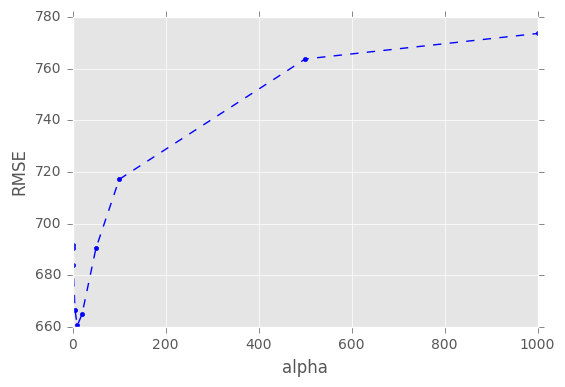

rmse: 660.5612900111676
prediction:
 [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]
true value:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [13]:
# case3A
ypred=ridge(x_train, y_train, x_test, y_test)
c3a=rmse(ypred,y_test)
print("rmse:",c3a)
print("prediction:\n",ypred[:20])
print("true value:\n",y_test[:20])

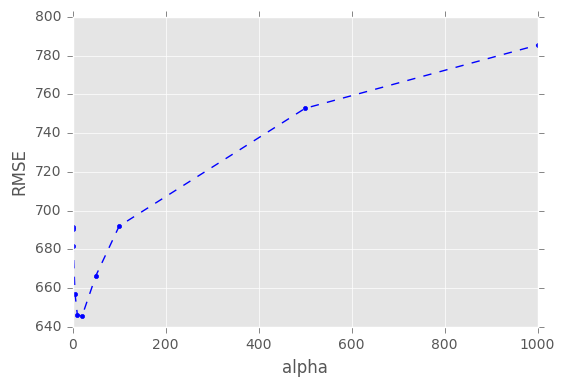

rmse: 645.5168123938736
prediction:
 [1142.26954234  254.15701492 1834.02488944   15.7181687   599.76366292
  635.94038984  427.85644416  603.66205989  514.52378787  580.00106007
  544.34176021  477.18442084  801.54554542  557.45287238  396.27886548
  615.15152412 1474.67417376 2504.86437273 3524.85964481 3438.40343713]
true value:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [16]:
# case3B
ypred=ridge(x_train_std, y_train_de, x_test_std, y_test-ymean)
ypred+=ymean
c3b=rmse(ypred,y_test)
print("rmse:",c3b)
print("prediction:\n",ypred[:20])
print("true value:\n",y_test[:20])

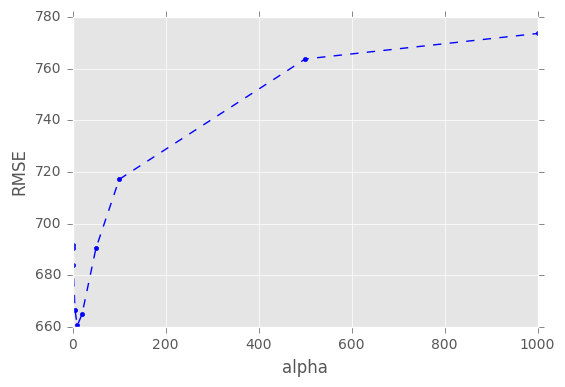

rmse: 660.5612900111674
prediction:
 [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]
true value:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [17]:
# case3C
ypred=ridge(x_train, y_train_de, x_test, y_test-ymean)
ypred+=ymean
c3c=rmse(ypred,y_test)
print("rmse:",c3c)
print("prediction:\n",ypred[:20])
print("true value:\n",y_test[:20])

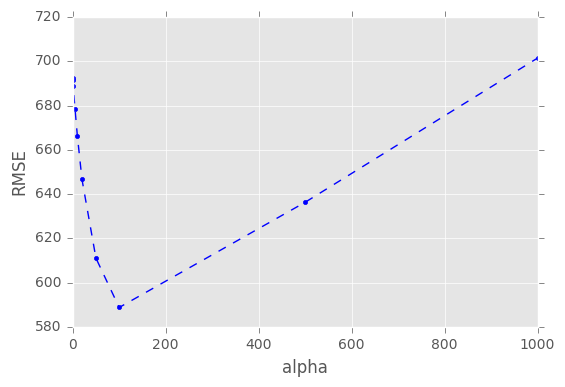

rmse: 588.793465752767
prediction:
 [1040.50012261  278.4650498  1997.72446427  -21.14036502  554.2152571
  602.8406419   337.52346959  599.43578526  470.29370416  500.7241404
  511.14861912  387.7435535   700.08957652  532.22280969  255.18311778
  653.3563783  1728.16919169 2775.00271095 3174.79225189 3141.85797609]
true value:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [19]:
# case3D
ypred=ridge(x_train_std_all, y_train_de, x_test_std_all, y_test-ymean)
ypred+=ymean
c3d=rmse(ypred,y_test)
print("rmse:",c3d)
print("prediction:\n",ypred[:20])
print("true value:\n",y_test[:20])

/Users/chessy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/chessy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


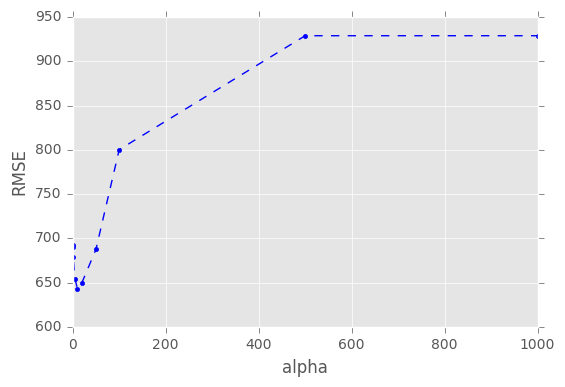

rmse: 643.3838482161638
prediction:
 [1241.59858493  287.88876062 2119.90674732  -16.29718326  449.10115061
  711.14559108  398.05917415  460.15124248  645.44299753  591.43645426
  429.966193    461.48315207  899.80928753  571.86640621  352.86521968
  548.08532475 1741.01511056 2712.05439167 3681.45942744 3645.11403307]
true value:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [20]:
# case 4
ypred=lasso(x_train_std, y_train_de, x_test_std, y_test-ymean)
ypred+=ymean
c4=rmse(ypred,y_test)
print("rmse:",c4)
print("prediction:\n",ypred[:20])
print("true value:\n",y_test[:20])

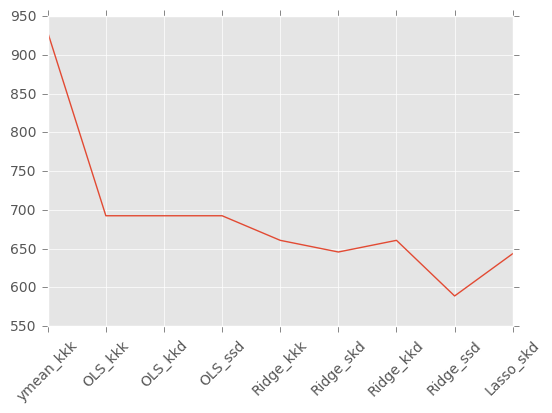

In [21]:
# Q11
plt.xticks(range(9), ['ymean_kkk','OLS_kkk','OLS_kkd','OLS_ssd','Ridge_kkk','Ridge_skd','Ridge_kkd','Ridge_ssd','Lasso_skd'], rotation=45)
y=[c1,c2a,c2b,c2c,c3a,c3b,c3c,c3d,c4]
plt.plot(y)
plt.show()

In [ ]:
"""
結果討論:

RMSE最好的是case 3D全部feature都標準化的ridge。
用全部的平均值來當預測值想當然的表現最不好，對於表現第二的OLS迴歸來說，
是否做前處理在結果沒有什麼差別。

對於ridge，有做標準化的表現都比較好，比較讓人驚訝的是對binary的變數做標準化，也會讓RMSE下降，
但是想想做標準化就是讓每個feature的影響力一樣，所以剛好讓ridge
對這筆資料在預測上表現比較好，只是對於標準化後binary feature的詮釋上，
binary的變數中還多了平均和標準差等有關母體的資訊，就不能用是或不是來單純的解釋，。

總的來說，y有沒有做de_mean對rmse都沒有差，對feature做標準化在lasso和ridge回歸模型有差，
但不一定是變好或變壞，要看資料的特性，而我在下面對lasso做了實驗發現全部feature都標準化的lasso
反而較keep binary的差，而且不做任何標準化的lasso甚至比全部標準化的表現還好一點點；
ridge做了標準化則是表現一直進步。
除去不受影響的OLS，有效的前處理大概是可以不用對y做de_mean但是要對x做標準化，至於binary的要不要也標準化，則是沒有一定答案。
"""

/Users/chessy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/chessy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


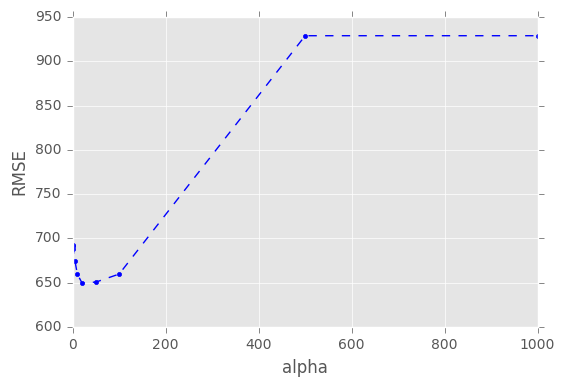

rmse: 649.7066697892805
prediction:
 [1149.99150866  329.64118711 2156.49638494  -60.08286467  464.42922825
  630.02519443  289.47624517  511.60477655  550.02050341  557.54797628
  457.31163226  439.60177002  805.80390365  527.34768792  195.78979577
  569.56371381 1839.41930147 2913.0525508  3809.59856178 3926.44998488]
true value:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [26]:
# case 4B
ypred=lasso(x_train_std_all, y_train_de, x_test_std_all, y_test-ymean)
ypred+=ymean
c4b=rmse(ypred,y_test)
print("rmse:",c4b)
print("prediction:\n",ypred[:20])
print("true value:\n",y_test[:20])

/Users/chessy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/chessy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


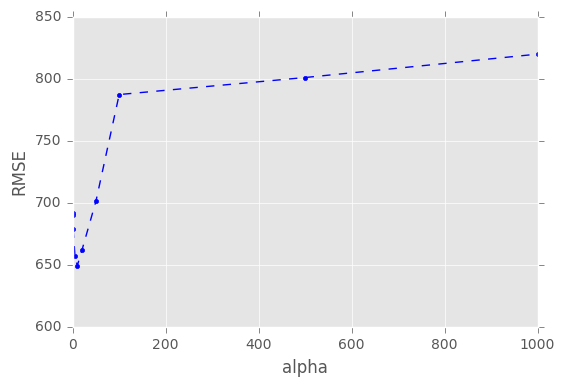

rmse: 649.4309018498917
prediction:
 [1251.44050536  255.45495851 2146.83940224  -86.93151728  437.62085336
  715.80349011  434.1051808   444.87806146  664.82715593  563.18944157
  406.06776633  476.43772568  925.23755881  607.29224312  326.37737141
  542.98038007 1709.3302011  2664.4040225  3727.26750969 3665.36729958]
true value:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [24]:
# case 4C
ypred=lasso(x_train, y_train, x_test, y_test)
c4c=rmse(ypred,y_test)
print("rmse:",c4c)
print("prediction:\n",ypred[:20])
print("true value:\n",y_test[:20])